# Test Exception

## Definition

An Exception is an event, which occurs during the execution of a program that disrupts the normal flow of the program’s instructions or in simple words, any issue which makes your test case stop in between the execution.

source: [click me](https://www.linkedin.com/pulse/11-most-common-exceptions-selenium-webdriver-logic-qa/)

When Selenium is used to run tests, exceptions can occur if there is a problem with the test script, the browser, or the application being tested.

Some examples of Selenium test exceptions include:

- `NoSuchElementException` <br>
raised when the script tries to interact with an element on the page that does not exist.
- `TimeoutException` <br>
raised when a command takes longer than the specified amount of time to complete.
- `NoSuchWindowException` <br> 
raised when the script tries to switch to a window that does not exist.
- `StaleElementReferenceException` <br>
raised when the script tries to interact with an element that is no longer attached to the DOM.

These are just a few examples and there are many more exception types that Selenium may raise, depending on the situation. It is important to handle these exceptions properly in order to avoid the script to stop working and to get a clear understanding of what went wrong.

# Test Exceptions

Page to test: https://practicetestautomation.com/practice-test-exceptions/

## Test case 1: NoSuchElementException

1. Open page
2. Click Add button
3. Verify Row 2 input field is displayed

Row 2 doesn’t appear immediately. This test will fail with org.openqa.selenium.NoSuchElementException without proper wait

In [ ]:
def test_no_element_exception(self, driver):
    # Open the page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    """Click Add button on Row 1"""
    # Verify The Row1 is displayed
    row1_locator = driver.find_element(By.ID, "row1")
    assert row1_locator.is_displayed()

    # Click Add button
    add_locator = driver.find_element(By.ID, "add_btn")
    assert add_locator.is_displayed(), "'Add' Button is missing"
    add_locator.click()

    """Row 2 Is displayed"""
        # Verify Row 2 availability
    row2_locator = driver.find_element(By.ID, "row2")
    assert row2_locator.is_displayed(), "Row 2 Is missing"
    
    # Verify the Toast bar is displayed
    toast_locator = driver.find_element(By.ID, "confirmation")
    actual_toast_msg = toast_locator.text
    assert actual_toast_msg == "Row 2 was added", "Added Toast Message is incorrect"



Previous script is correct when implemented normally, but on this case we'll receive this error <br>
`(TestException.test_no_element_exception) '' != 'Row 2 was added'`

This issue occurs because:
1. The elements is not loaded yet
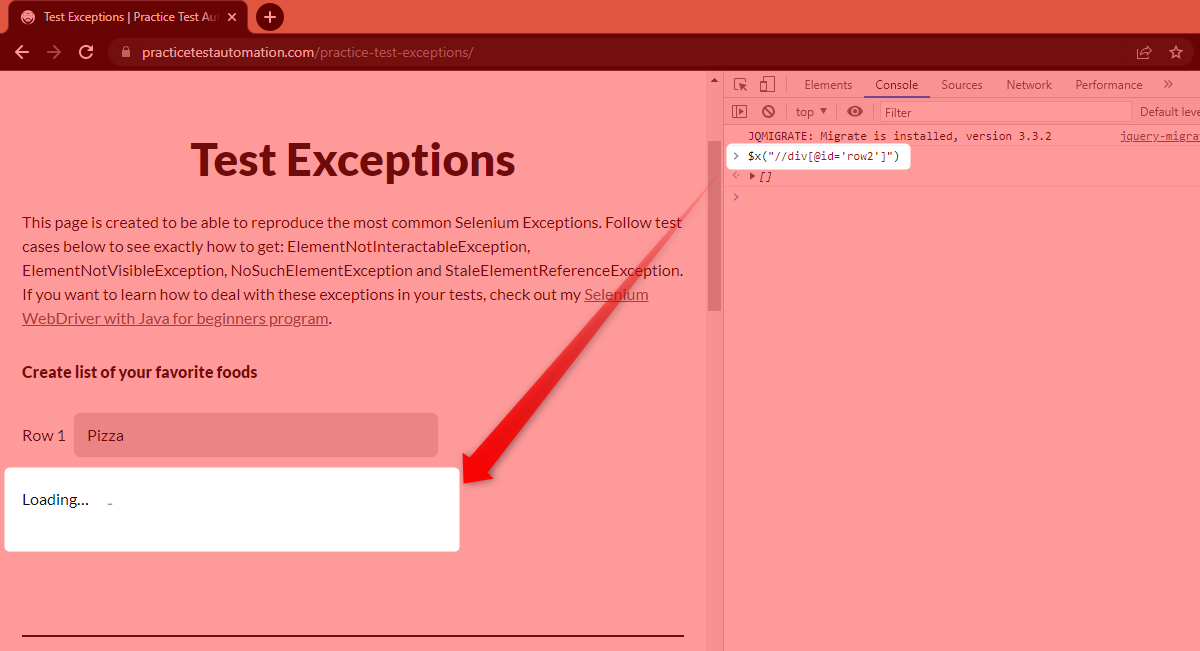 <br>
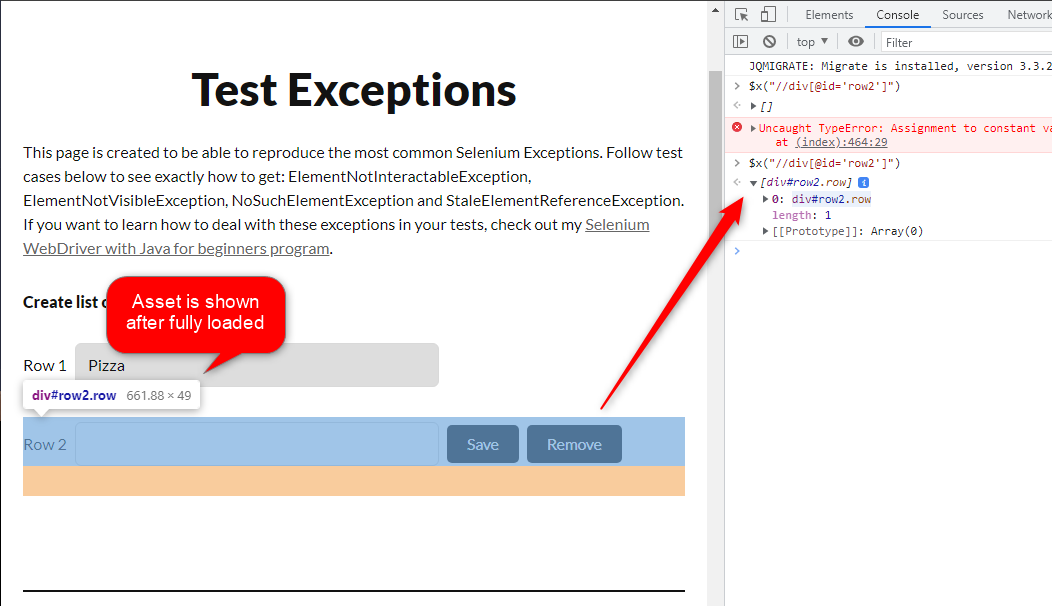
2. The waiting time for the asset fully loaded is less than actual loading time
3. The driver will return `"no element error"` since the assets is not there, when the script is executed.

Workaround for this issue is using explicit wait as described on the `4_1 python` file
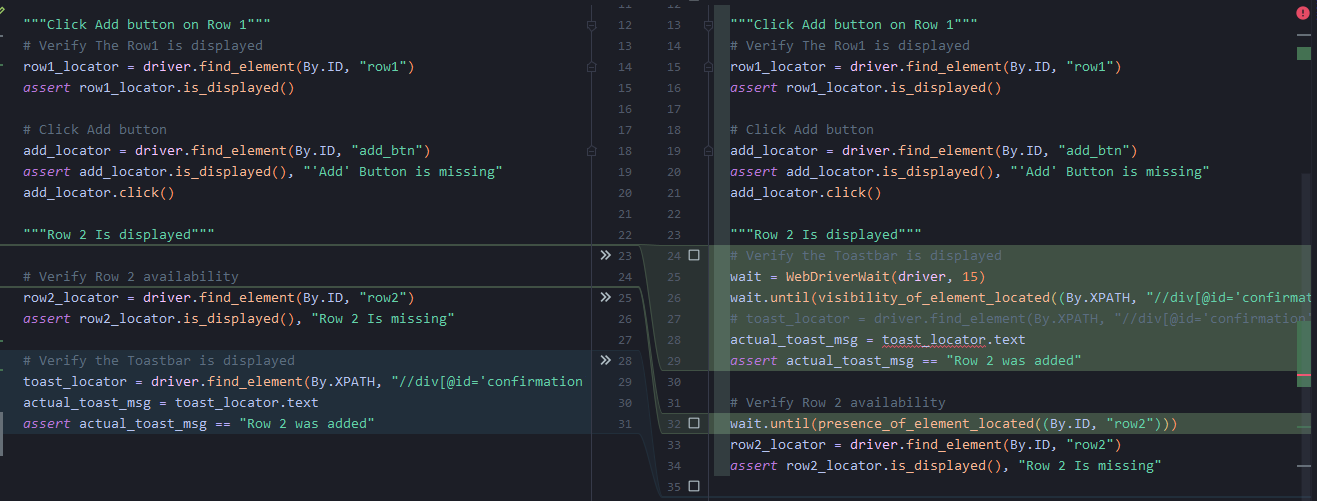

## Test case 2: ElementNotInteractableException

1. Open page
2. Click Add button
3. Wait for the second row to load
4. Type text into the second input field
5. Push Save button using locator By.name(“Save”)
6. Verify text saved

This page contains two elements with attribute name=”Save”.
The first one is invisible. So when we are trying to click on the invisible element, we get ElementNotInteractableException.

In [ ]:
def test_not_intractable_element(self, driver):
    # Open The Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    "Click Add button on Row 1"
    driver.find_element(By.ID, "add_btn").click()

    "Type text into the second input field"
    # Pass the text to the text box
    row2_input_locator = driver.find_element(By.XPATH, "//div[@id='row2']/input")
    row2_input_locator.send_keys("Written using python selenium")

    "Push Save button using locator By.name('Save')"
    save_btn_locator = driver.find_element(By.NAME, "Save")
    save_btn_locator.click()

    "Verify text saved"
    wait = WebDriverWait(driver, 30)
    save_toast_locator = wait.until(elem_vis((By.ID, "confirmation")))
    actual_save_toast = save_toast_locator.text
    assert actual_save_toast == "Row 2 was saved", "Saved Toast Message is incorrect"

By Running those scripts, we'll receive this error syntax <br>
`selenium.common.exceptions.ElementNotInteractableException: Message: element not interactable` <br>

This is the actual reason why this issue occurs:
1. We defined the script to find any elements with the "Save" name
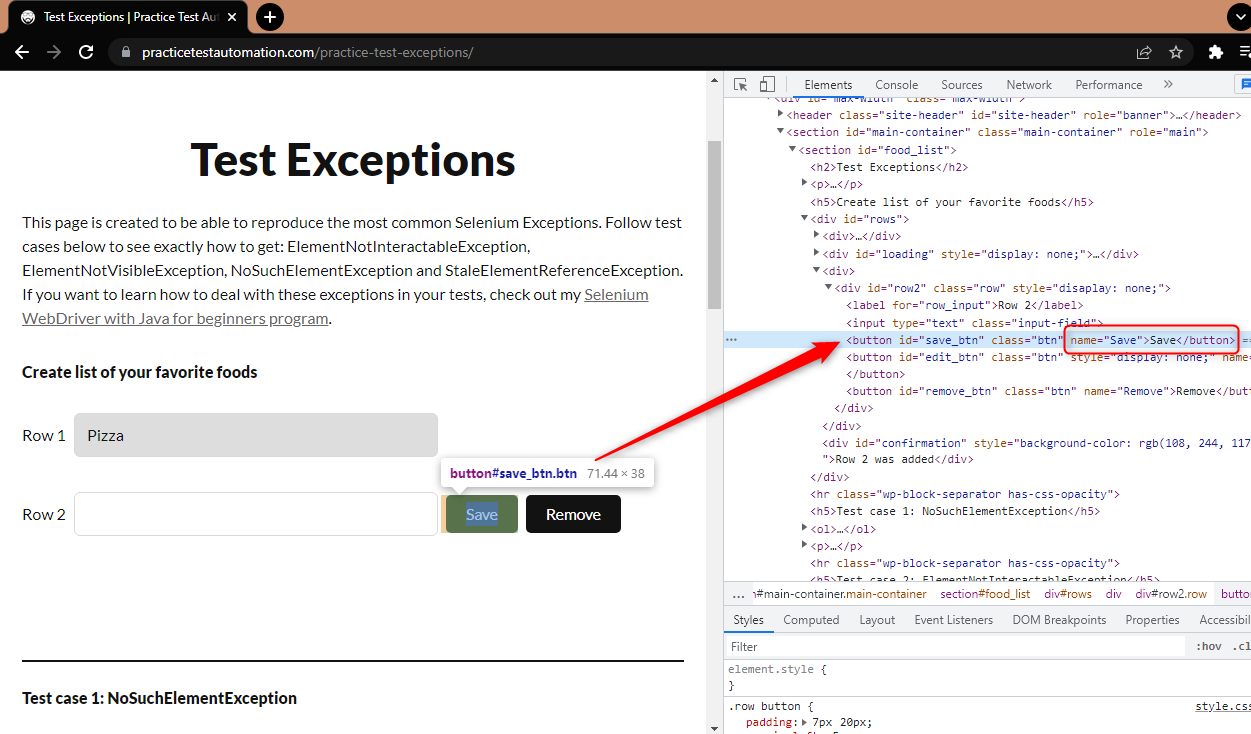
2. This is a correct locator but not unique elements
3. To validate wether this is an unique or not, we can use the console tab
4. `$x("//button[@name='Save']")`, will return all button object with the "Save" name
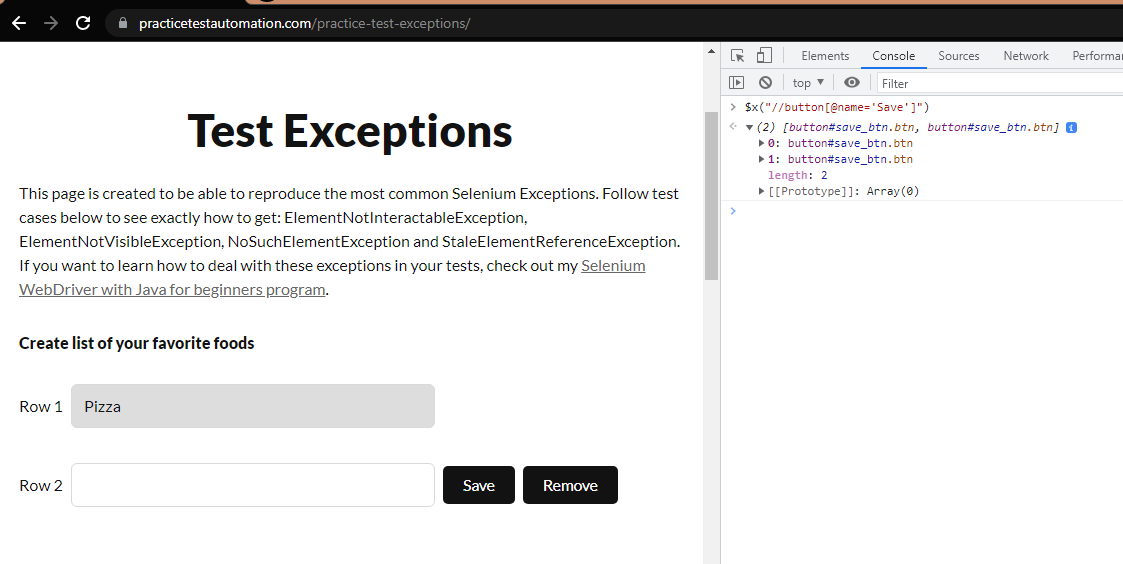
5. Check both returned elements
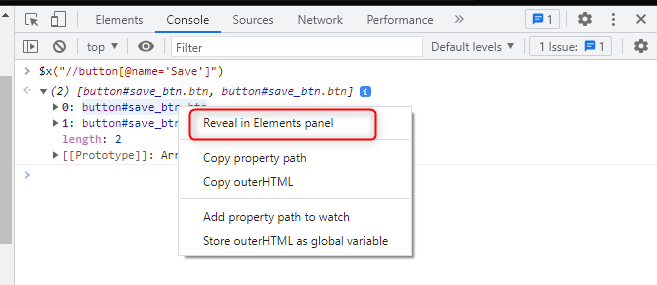
6. Notice that, there are another 'hidden' Save button on the elements
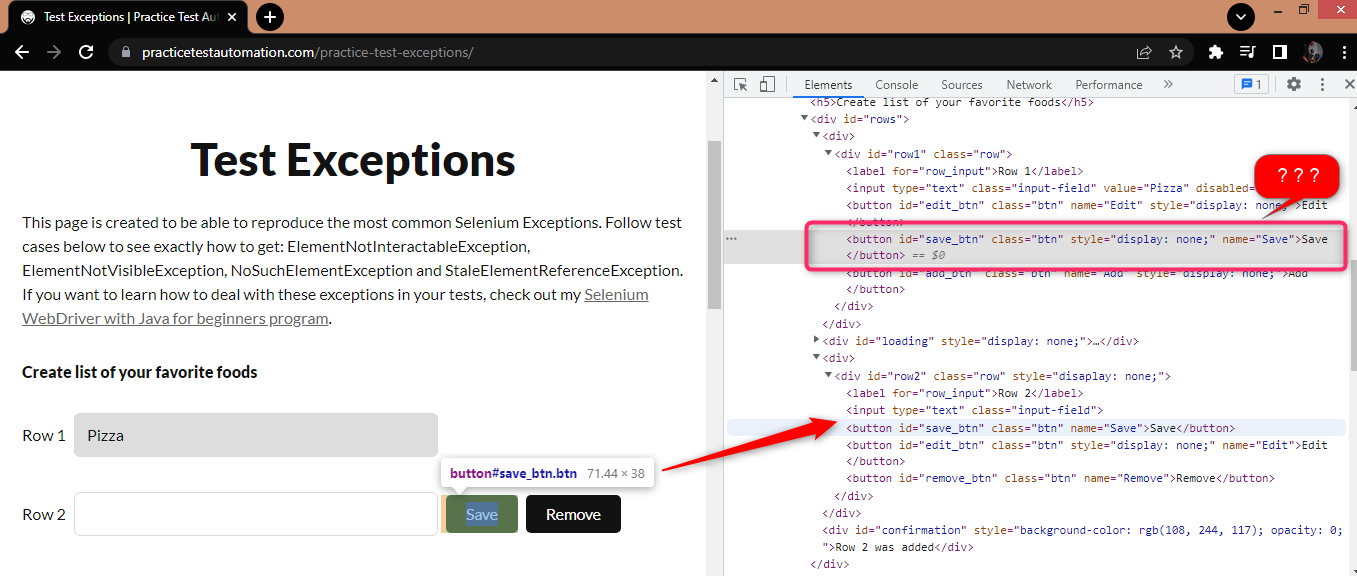

The hidden "Save" button can be revealed by editing Row 1
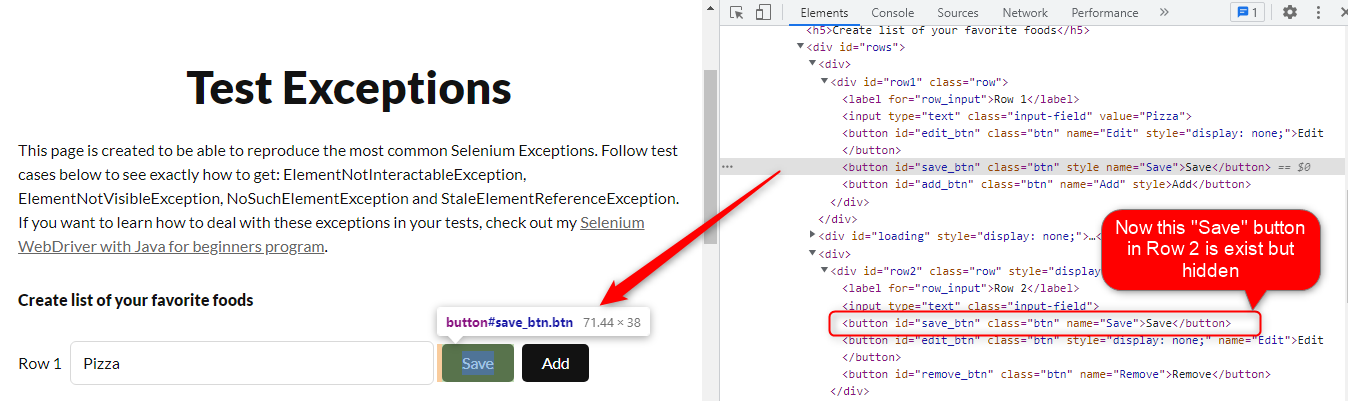

The solution for this issue is simply change the locator method using unique identifier

    Before

In [ ]:
"Push Save button using locator By.name('Save')"
save_btn_locator = driver.find_element(By.NAME, "Save")
save_btn_locator.click()


    After

In [ ]:
save_btn_locator = driver.find_element(By.XPATH, "//div[@id='row2']/button[@name='Save']")
save_btn_locator.click()

## Test Case 3: InvalidElementStateException

Testing Step
1. Open page
2. Clear input field
3. Type text into the input field
4. Verify text changed

This test case can be converted into these scripts:

In [ ]:
def test_invalid_state(self, driver):
    # 1 Open Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")
    wait = WebDriverWait(driver, 10)

    "2. Clear Input Field"
    # Locate the textbox
    row1_textbox = driver.find_element(By.CLASS_NAME, "input-field")

    # Clear the text
    row1_textbox.clear()

When we try to execute those scripts, we'll receive error syntax:
`selenium.common.exceptions.InvalidElementStateException: Message: invalid element state: Element is not currently interactable and may not be manipulated`
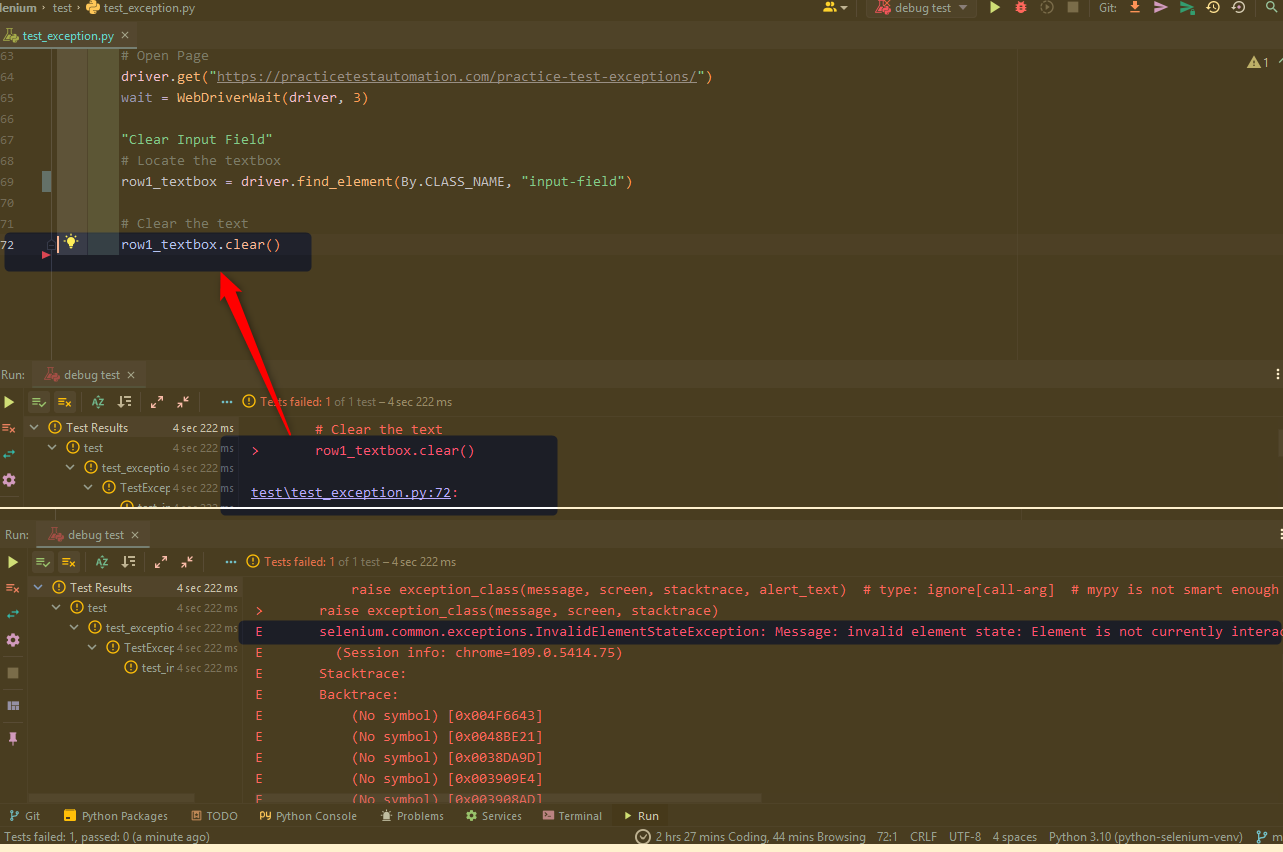


Possible causes for this error can include:
- Attempting to interact with an element that is not visible or enabled on the page
- Attempting to interact with an element that is not present in the DOM
- Attempting to interact with an element that has been previously interacted with and is no longer valid (e.g. a stale element reference)
- Attempting to interact with an element that is in a state where it cannot be interacted with (e.g. a disabled text field)

By those reason, we need to isolate the latest cause since we handling input field
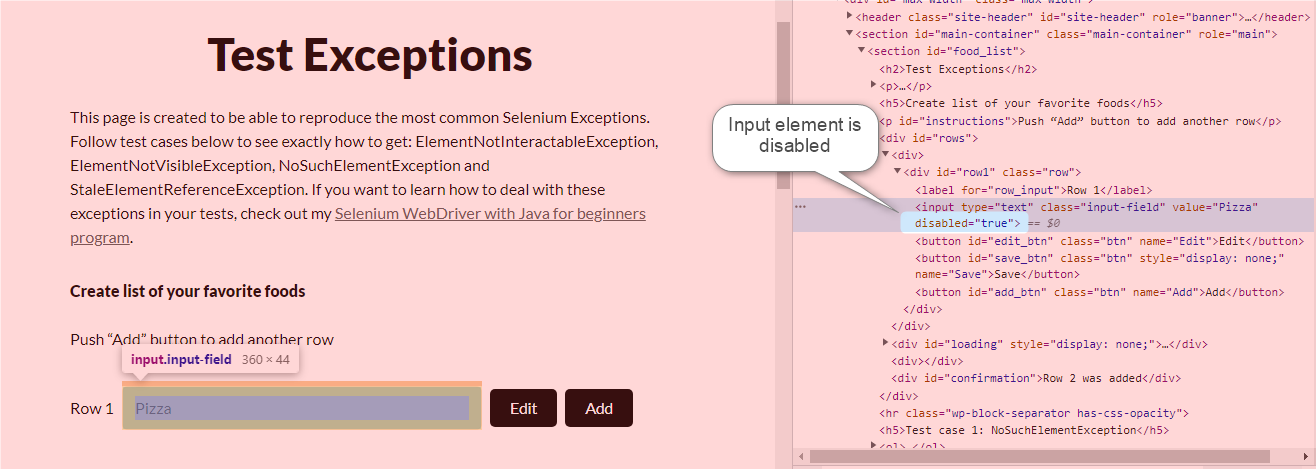

The solutions for that issue is adding extra step to enable the input element. In this case we will add edit button before the script for *clearing text* is executed <br>
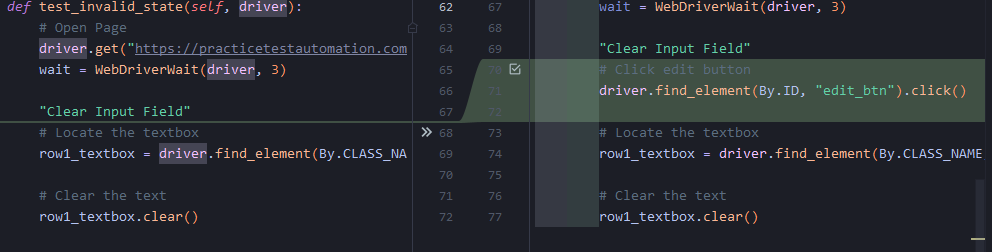

The next step is adjusting the textbox locator <br>
This is another extra modification to the test since the processes for running the clear step is too fast, in order to avoid the fail test due to the processes for enabling the input field is delayed, we need to adjust the `row1_textbox` locator into the proper method by adding these scripts. <br>
`wait.until(element_to_be_clickable(row1_textbox))`<br>
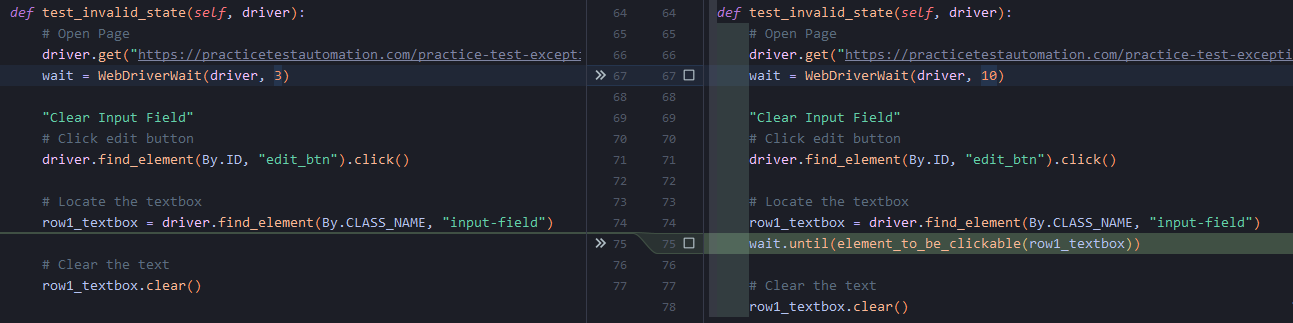

The function from that scripts is validating the input field, from disabled to be enabled (clickable) <br>
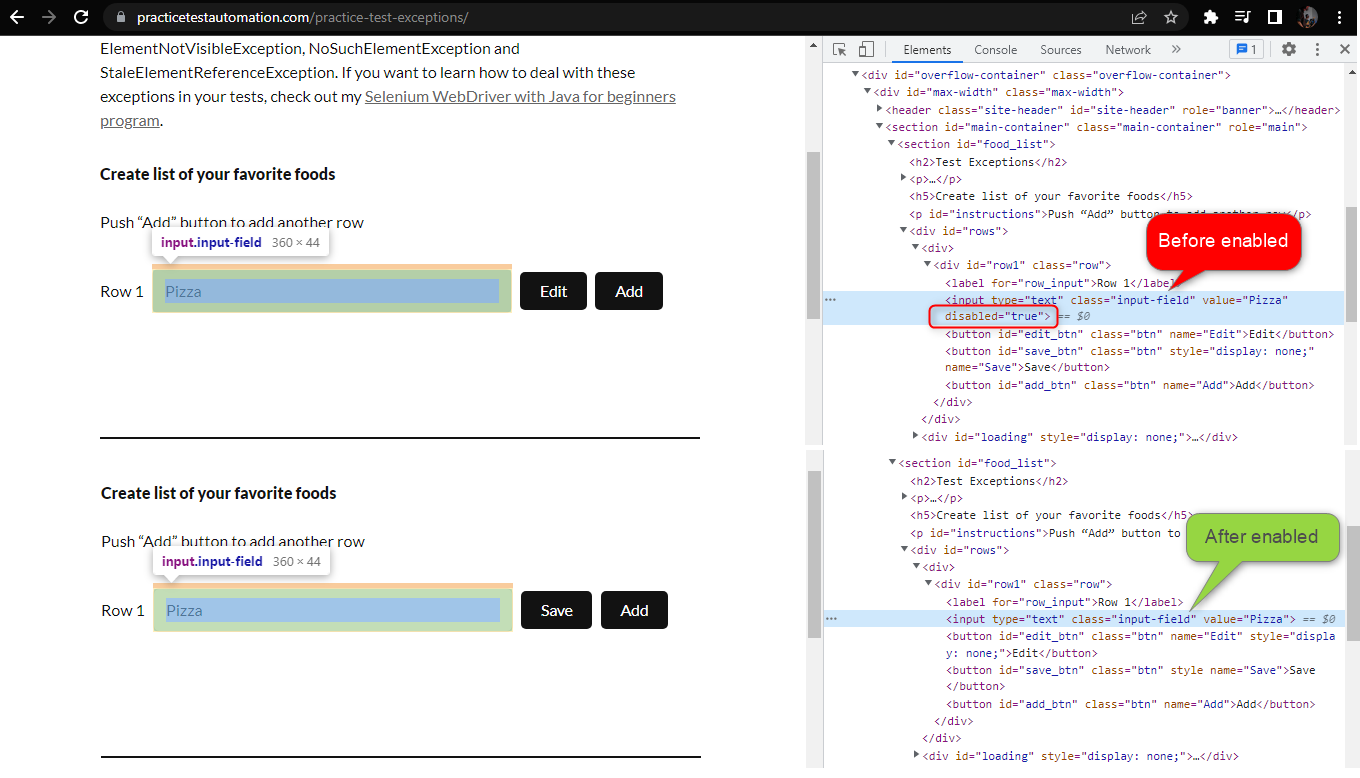


Then complete the rest of the script for the next steps.

In [ ]:
def test_invalid_state(self, driver):
    # Open Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")
    wait = WebDriverWait(driver, 10)

    "Clear Input Field"
    # Click edit button
    driver.find_element(By.ID, "edit_btn").click()

    # Locate the textbox
    row1_textbox = driver.find_element(By.CLASS_NAME, "input-field")
    wait.until(element_to_be_clickable(row1_textbox))

    # Clear the text
    row1_textbox.clear()

    "Type text into the field"
    row1_textbox.send_keys("Written using Python Selenium")

    "Verify The saved text"
    # Hit the save button
    wait.until(presence_of_element_located((By.ID, "save_btn"))).click()

    # Verify The success/saved toast-bar
    saved_toast = wait.until(visibility_of_element_located((By.ID, "confirmation")))
    assert saved_toast.text == "Row 1 was saved", "Unexpected toast bar message is found"

## Test Case 4: StaleElementReferenceException

1. Open page
2. Find the instructions text element
3. Push add button
4. Verify instruction text element is no longer displayed

Those steps can be converted into test script like this:

In [ ]:
def test_stale_element_reference(self, driver):
    # Open page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    # Find the instructions text element
    instruction_locator = driver.find_element(By.ID, "instructions")
    assert instruction_locator.is_displayed(), "Instructor text is missing"

    # Hit Add Button
    driver.find_element(By.ID, "add_btn").click()

    # Instruction text should be disappear
    assert not instruction_locator.is_displayed(), "Instruction text still exist"

After we run the test we will receive this error: <br>
`selenium.common.exceptions.StaleElementReferenceException: Message: stale element reference: element is not attached to the page document` <br>
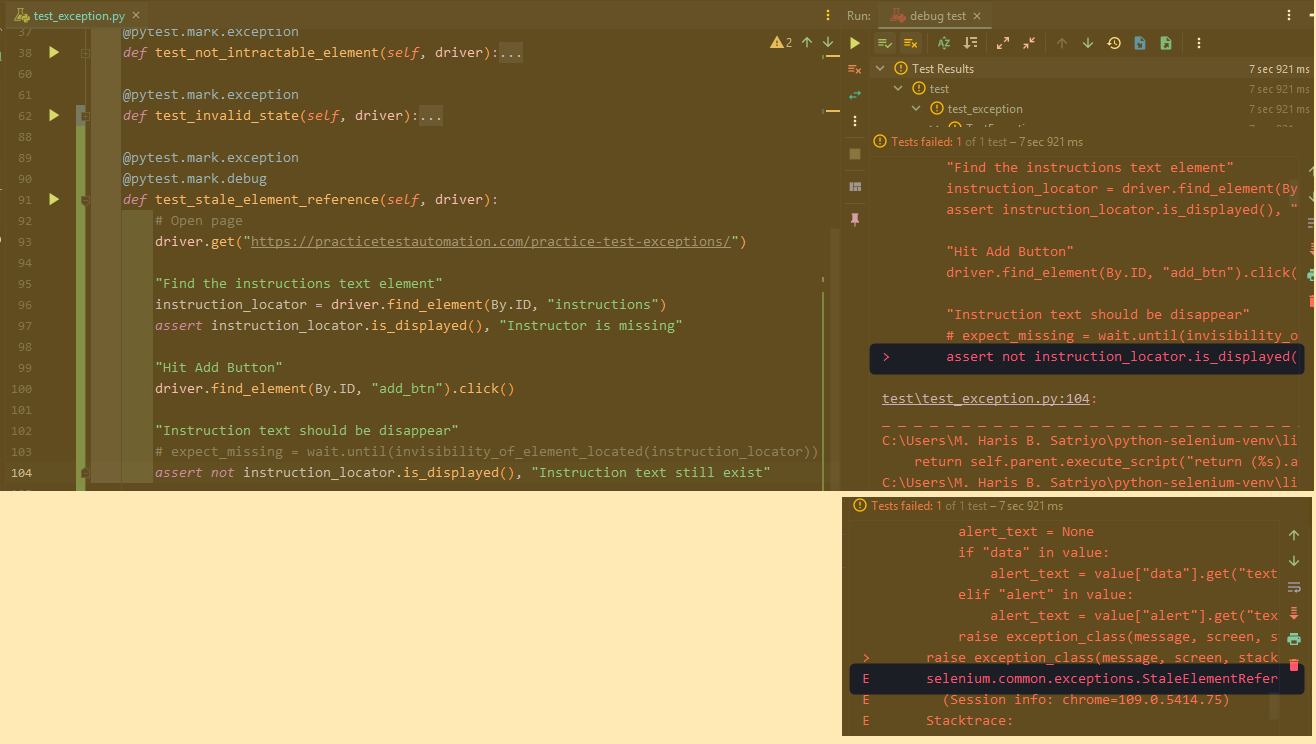

This can happen for a variety of reasons, such as: 
- element being dynamically removed from the page or the page being refreshed
- navigated to a different page.
- switched to another window or into or out of a frame or iframe

full docs: [selenium documentation](https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/#stale-element-reference-exception) <br>
But since we don't navigate to other page, or switch to other window, we can isolate the main cause for ***element is removed*** part.

- From the `Find the instructions text element` step we can clearly understand that element we want to validate is exist <br>
This element is detected as
`<p id="instructions">Push “Add” button to add another row</p>` which is, `p` : paragraph element with instructions `id` <br>
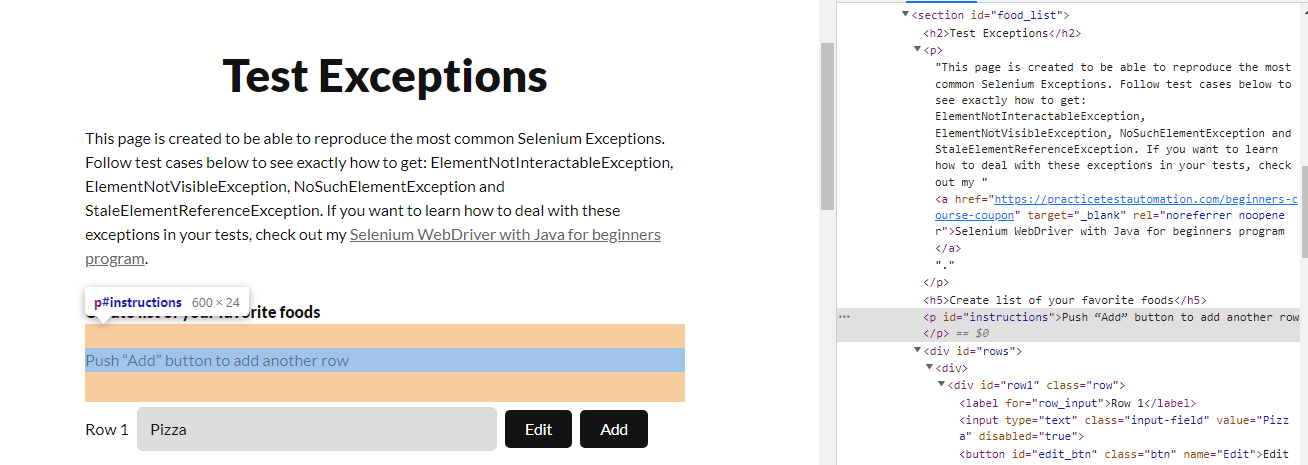
- Then we proceed to next step `Hit Add Button`
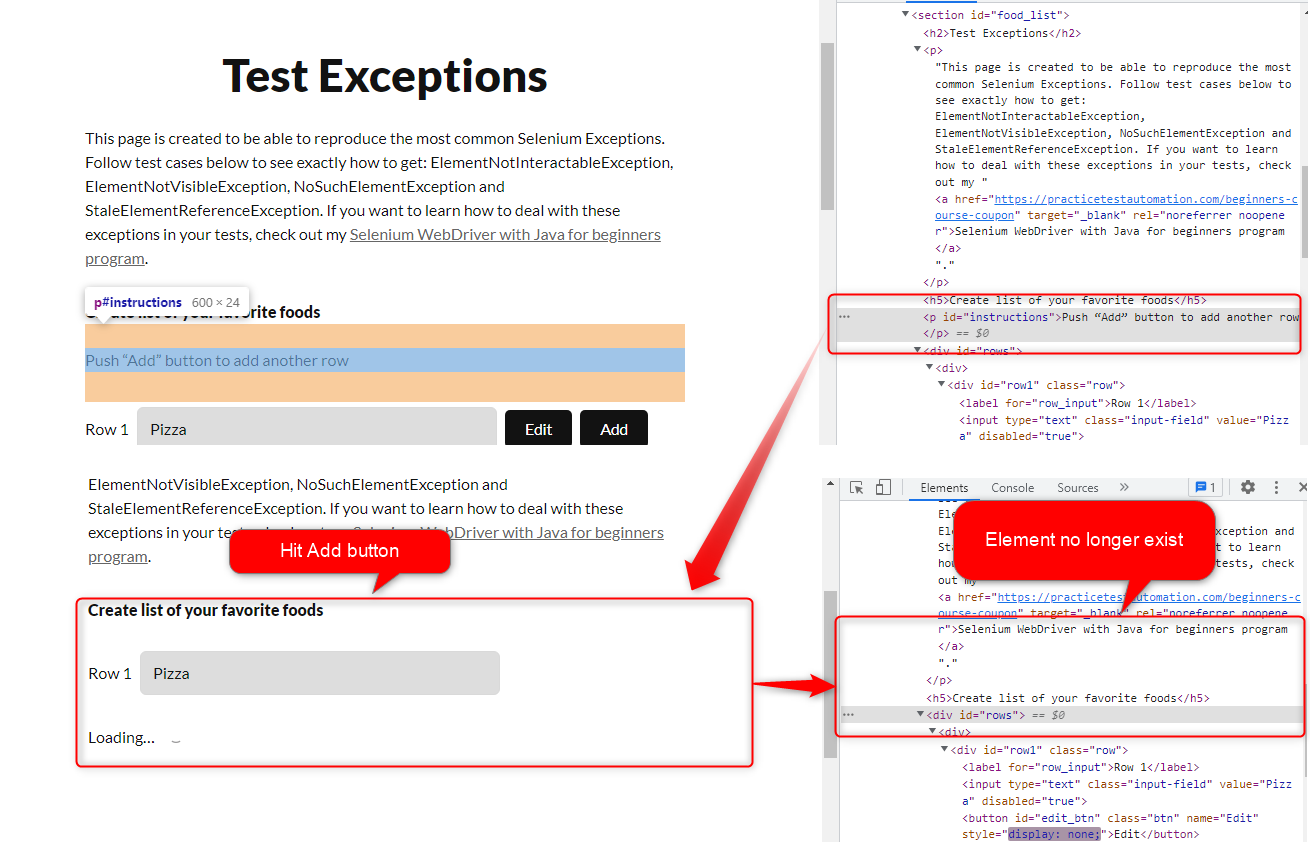
By executing this step, we know that the element is no longer exist when we click Add button. So this is the main reason why our script returning the error when we try to call the element locator after being removed <br>
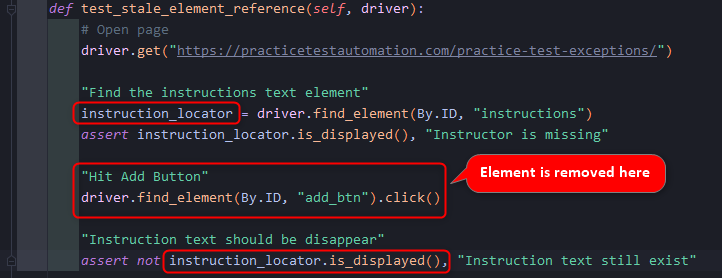

### Solutions:
These are the suggested solutions that generated by chatAI:

#### 1. Refind the element after the page has been updated: If the StaleElementReferenceException is occurring due to the page being updated, you can simply refind the element after the update. For example:

#### 2. Use a try-except block: You can use a try-except block to catch the StaleElementReferenceException and refind the element within the except block. For example:

#### 3. Use ExpectedConditions to wait for the element to be present: You can use the ExpectedConditions class from Selenium's webdriver.support module to wait for the element to be present on the page before interacting with it. For example:

From mentioned solutions we will narrowed it down to the solutions number 3 which is the shortest and most possible method. In this case we will using expected conditions [`invisibility_of_element_located(locator)`](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html?highlight=expected#selenium.webdriver.support.expected_conditions.invisibility_of_element_located) since we need to validate that the element we want to check is doesn't exist anymore. Then the final script will be something like this: <br>
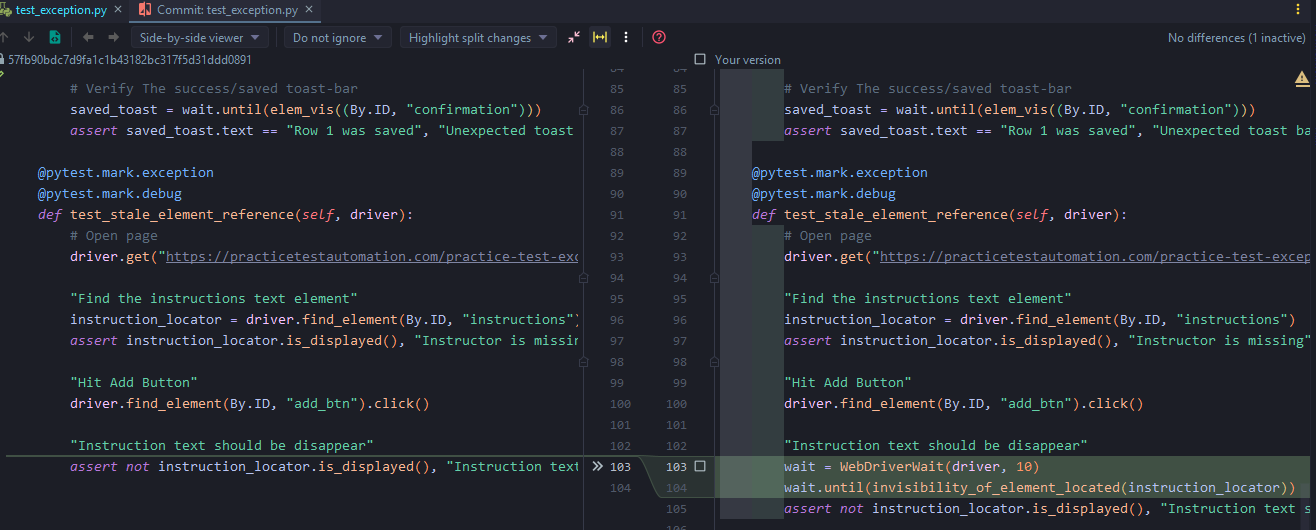

1. The script calls the `until` method of the `WebDriverWait` instance, passing in the `invisibility_of_element_located` function and the ***element's locator***. This causes the script to wait for up to 10 seconds for the element to become invisible.
2. After the element becomes invisible, the script runs the assert statement to check if the element ***<font color = 'magenta'>is not displayed </font> or still visible***, if the element is still displayed, it will raise an error with the message "Instruction text still exist".

The other approaches for this test case also can be written like this but with step modification

The script works as follows:

1. The script starts by opening the specified web page using the `get` method of the driver.
2. It then locates the "Add" button on the page using the `find_element` method and the `By.ID` locator, and clicks on it to trigger some action on the page.
3. Next, the script creates an instance of `WebDriverWait` with a waiting time of 10 seconds.
4. It then calls the `until` method of the `WebDriverWait` instance, passing in the `invisibility_of_element_located` function, and the locator of the element which is the text to be invisible. This causes the script to wait for up to 10 seconds for the element to become invisible.
5. The `until` method returns `true` if the element is no longer displayed on the page and the script then runs an `assert` statement to check if the returned value is true or not. If the returned value is `false`, it will raise an error with the message `"Instruction text still exist"`

## Test case 5: TimeoutException

Test Scenario
1. Open page
2. Click Add button
3. Wait for 3 seconds for the second input field to be displayed
4. Verify second input field is displayed

Raw Testscripts:

Let's focus on the last 2 comments work (Verifying part):
- The `until` method returns `true` if the element `is displayed` and `present` on the page respectively and the script then continues to the next step.
- The first `until` method `waits` for the element with the ID `"confirmation"` to be *visible*, and the second `until` method `waits` for the element with the ID `"row2"` to be `present` on the page.

But when the test is executed we receive error `selenium.common.exceptions.TimeoutException`<br>
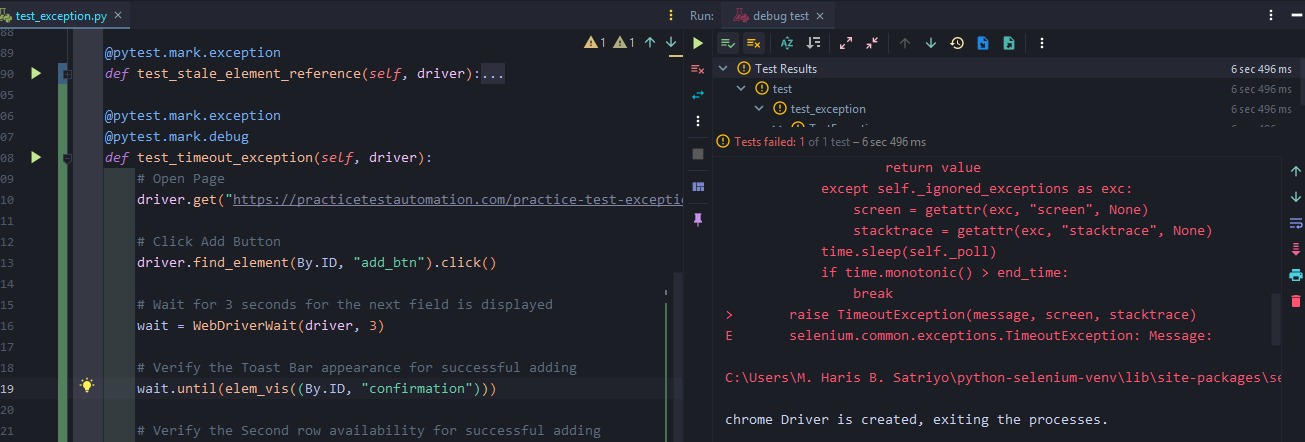

From our [AI friend](https://chat.openai.com/chat), we receive possible reasons from that error message
1. Slow internet connection or website performance: The website being tested may be running slowly or there may be issues with the internet connection that are causing the operation to take longer than expected.
2. Incorrect wait time: The wait time specified in the script may be too short for the operation to complete.
3. Incorrect locator: The locator used to find the element may be incorrect, so Selenium is unable to find the element within the specified time limit.
4. Incorrect expected condition: The expected condition used in the script may be incorrect, so Selenium is unable to wait for the correct condition to be met.
5. Element is not present: The element is not present on the page and thus the script is unable to find it.
6. Element is not interactable: The element is present but it's not interactable, as it's hidden or obscured by other elements.
7. Element is present but not visible: The element is present on the page but it's not visible to the user.
8. Timeout setting is too low: The default timeout setting for Selenium may be set too low, causing the script to time out before the operation completes

Since there are so many reasons that result that error, we need to inspect the test manually one by one.

#### Timeout error Debugging
1. Observe the error location
2. Backwards 1 - 2 steps and put the breakdown marker
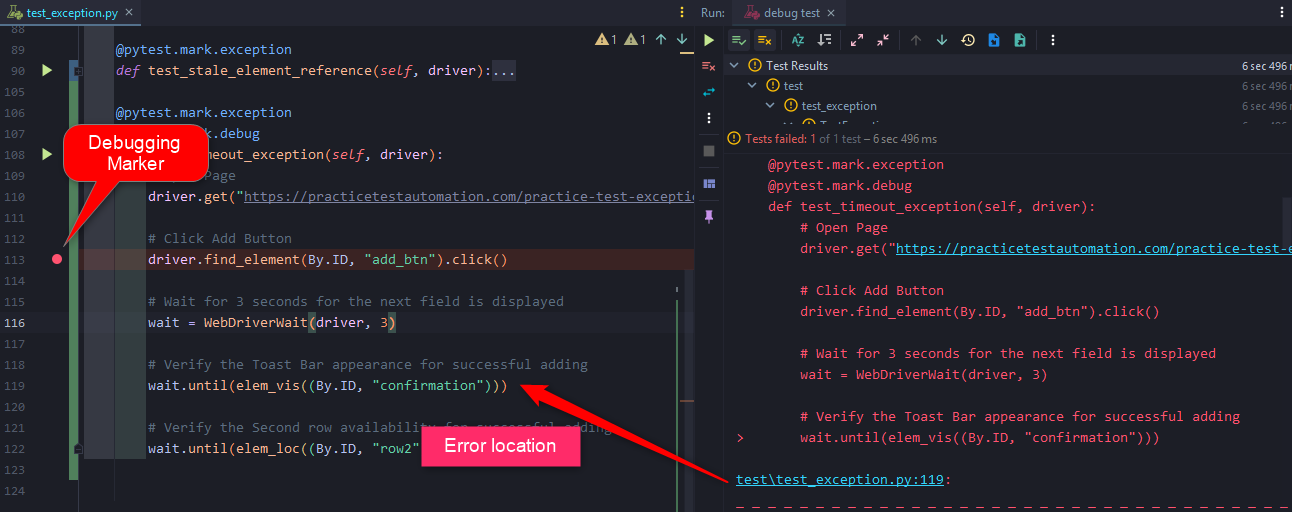
3. Run the debug tests
4. Inspect the tests step by step
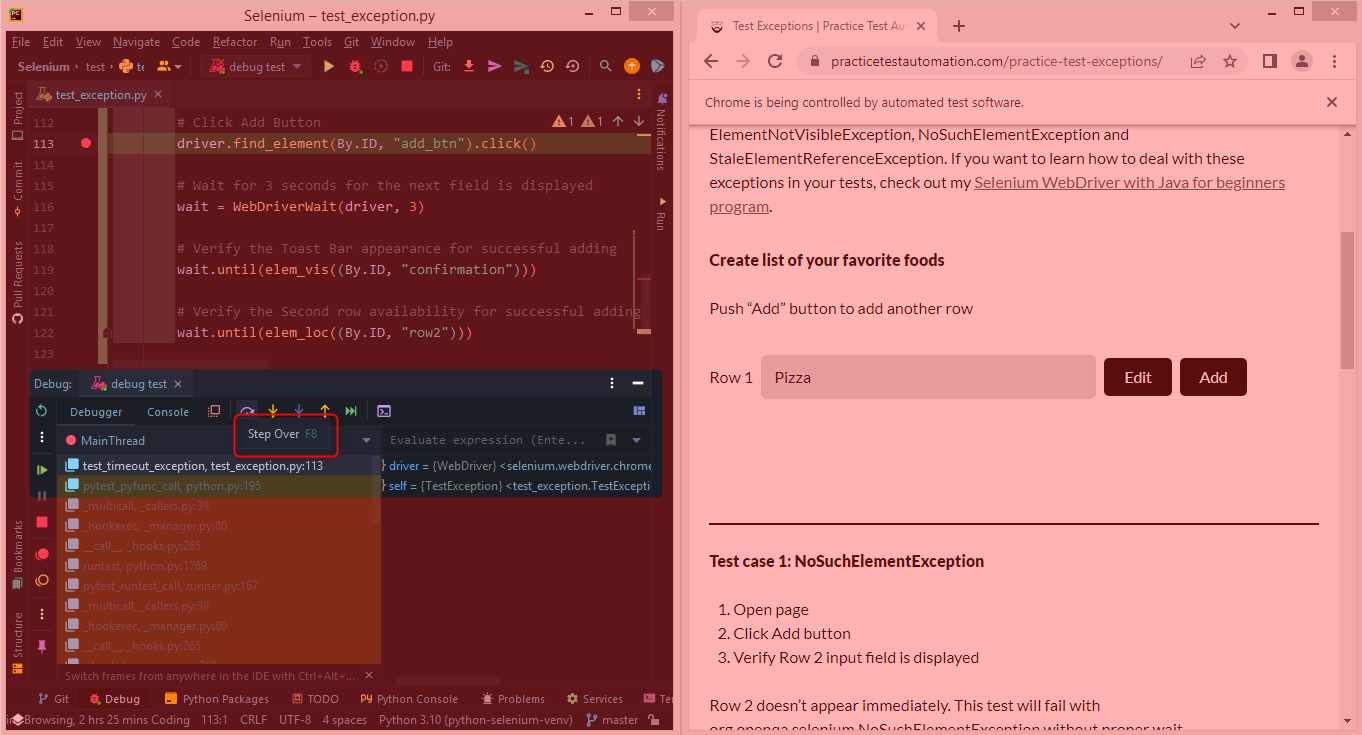
5. Since we don't find any error when we run step by step, we can eliminate the possibility from possible reasons number ***3,4,5,6,7***
6. Now, let's observe the possibility from number 1, 2, 8 by check the website ping or our connection
7. No network error detected, we can eliminate the reason number 1 and proceed the reason number 2
8. After validating manually the loading time for the element to be presence / exist is more than 3 seconds, but the passed waiting time is 3 seconds
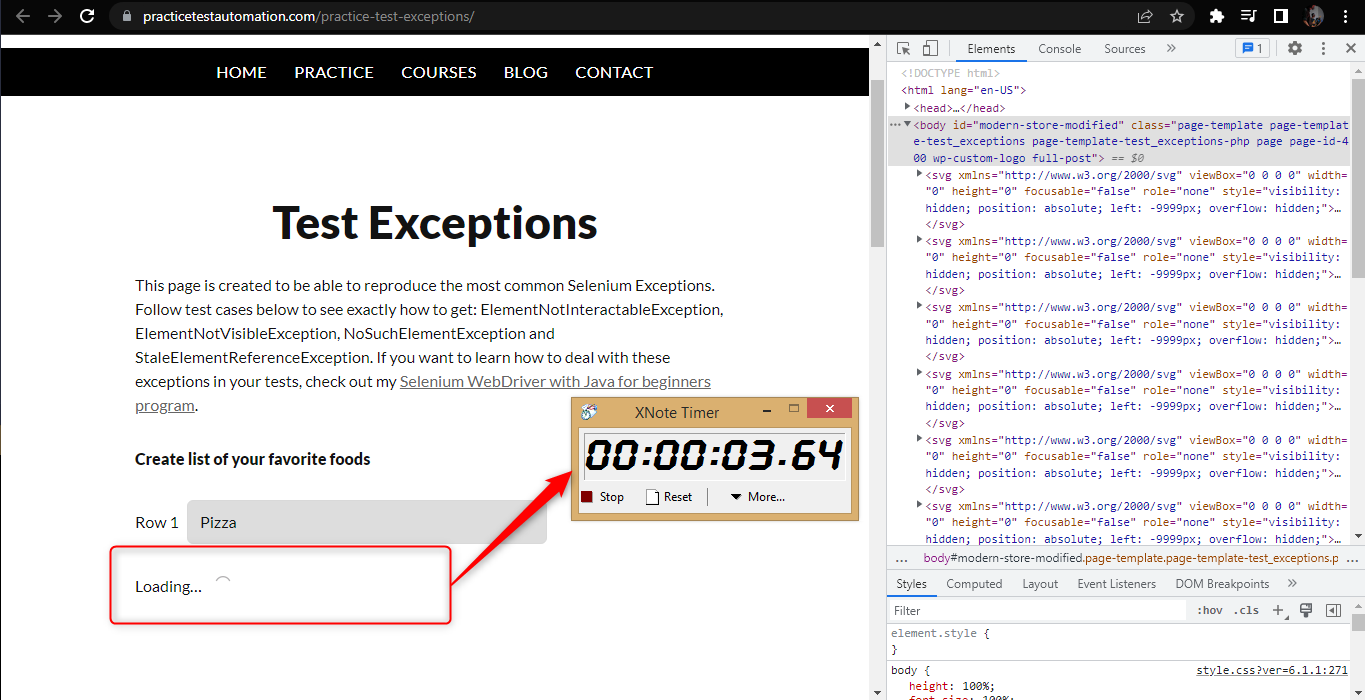


#### Solutions
Since we notice that the error is caused by the incorrect waiting time, we can add more time to the passed argument for waiting the assets to be loaded, and try to run the test again <br>
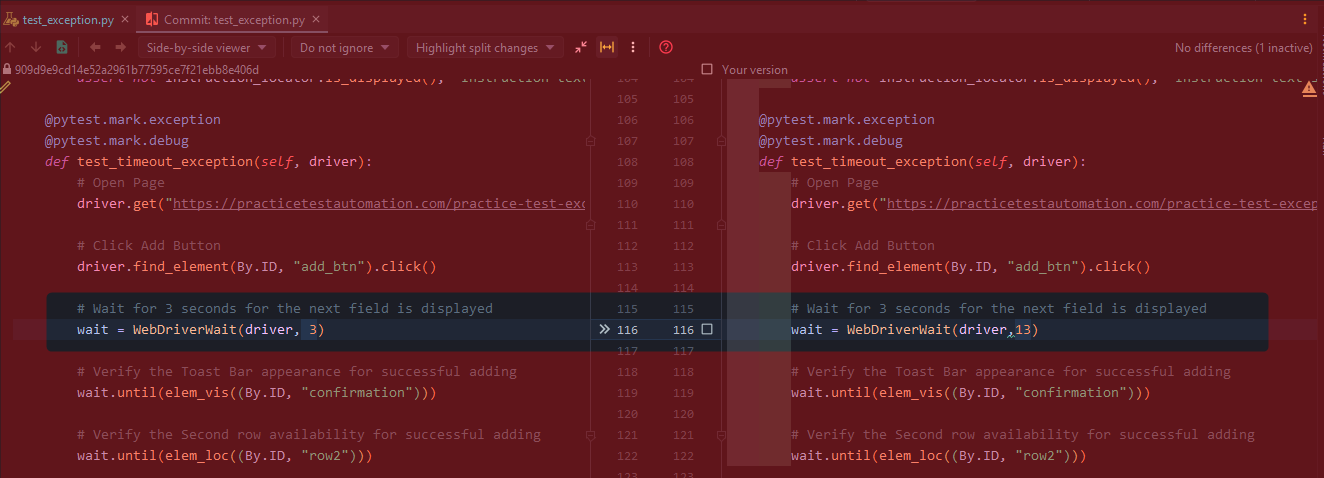